---
# Lambda School Data Science - Intro to Pandas
---
# 06 - Basic Visualizations
---



##STOP! BEFORE GOING ANY FURTHER...  


1. Click "File" at the top.
2. Then, "Save a Copy in Drive."
3. Change the file name to "FIRSTNAME_LASTNAME_1_2"  

Now you have a copy of this notebook in your Drive account. This is the copy you'll edit and submit. Be sure to do this for ***every*** assignment!




### Import pandas & matplotlib

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the data in the CSV file
You can find the data [here](https://raw.githubusercontent.com/plotly/datasets/master/data.csv). Should have a shape of (150000,11). Use this [resource](https://github.com/plotly/datasets/blob/master/data_dictionary.csv) for context.

In [0]:
Dir = "https://raw.githubusercontent.com/plotly/datasets/master/data.csv"
Data = pd.read_csv(Dir)

### Quickly inspect the head

In [36]:
Data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


### Inspect the tail

In [37]:
Data.tail(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149990,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


### What is the shape of the DataFrame? Does it correspond to what we expected? 

In [38]:
print("%d rows, %d columns... it's OK!" % Data.shape)

150000 rows, 11 columns... it's OK!


### Do you need to change the index?

In [39]:
print("No need to change the index in this case. No spurious columns...")

No need to change the index in this case. No spurious columns...


### Missing values?
You don't need to fill in these missing values, but don't forget that they're there!

In [40]:
print("Rows with missing values:\n------------------------")
for Column in Data.columns:
  Dnan = Data[Data[Column].isnull()] # Get cells with NaNs in column.
  Rows = Dnan.index.tolist()
  if (len(Rows) > 0):
    print("* In %8s column:" % Column)
    Line = str(Rows[0:25]).replace("]", "...")
    print("%s... %d in total" % (Line, len(Rows)))
print("\nData after filling blanks with 0s:")
Data.fillna(value = 0, inplace = True)
Data.head(10) # Fill NaNs with zeros.

Rows with missing values:
------------------------
* In MonthlyIncome column:
[6, 8, 16, 32, 41, 52, 58, 62, 71, 86, 92, 96, 100, 109, 115, 118, 124, 130, 141, 143, 159, 161, 166, 171, 179...... 29731 in total
* In NumberOfDependents column:
[8, 96, 109, 159, 238, 263, 284, 381, 382, 412, 436, 459, 488, 509, 526, 531, 541, 577, 588, 590, 615, 616, 650, 790, 814...... 3924 in total

Data after filling blanks with 0s:


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,0.0,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


### Out of the 11 features, which are discrete and which are continuous?


---



In [41]:
Types = {}
for Column in Data.columns:
  Type = str(Data[Column].dtype)
  if Type not in Types:
    Types[Type] = []
  Types[Type].append(Column)

print("Columns with integer data represent discrete variables:")
for Column in Types["int64"]: print("* %s" % Column)
print("Columns with float numbers represent continuous variables:")
for Column in Types["float64"]: print("* %s" % Column)

Columns with integer data represent discrete variables:
* SeriousDlqin2yrs
* age
* NumberOfTime30-59DaysPastDueNotWorse
* NumberOfOpenCreditLinesAndLoans
* NumberOfTimes90DaysLate
* NumberRealEstateLoansOrLines
* NumberOfTime60-89DaysPastDueNotWorse
Columns with float numbers represent continuous variables:
* RevolvingUtilizationOfUnsecuredLines
* DebtRatio
* MonthlyIncome
* NumberOfDependents


### Plot each feature with the appropriate visualization

#### Histograms

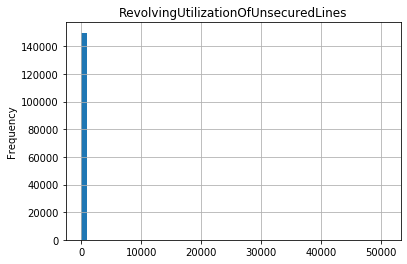

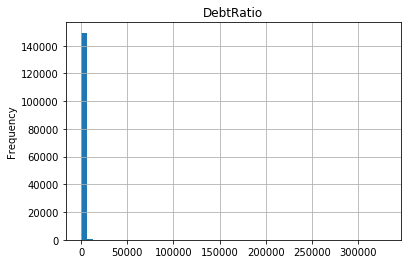

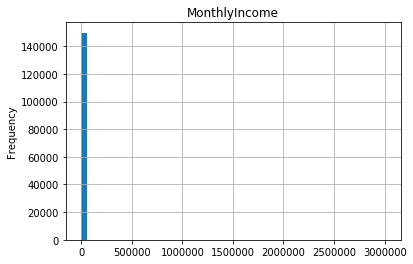

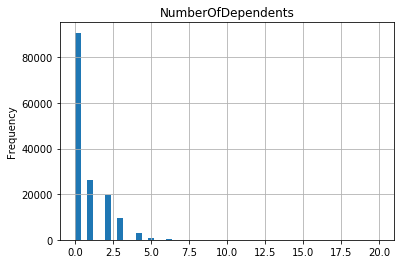

In [42]:
# Histograms are suitable for continuous data. Hence...
for Column in Types["float64"]:
  Data[Column].plot(kind = "hist", title = Column, bins = 50)
  plt.grid(True)
  plt.show()

#### Bar charts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  


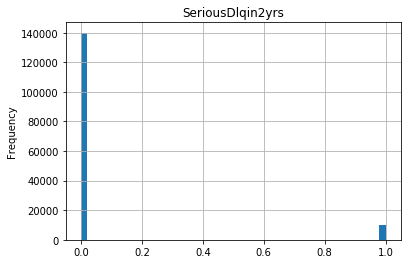

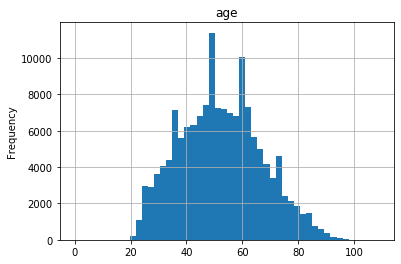

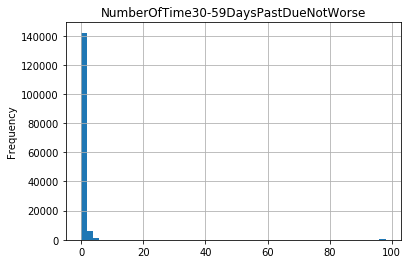

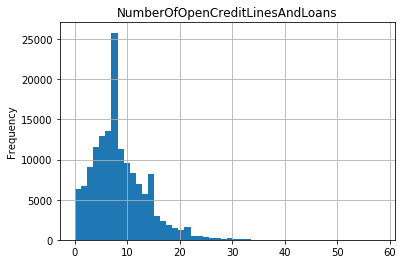

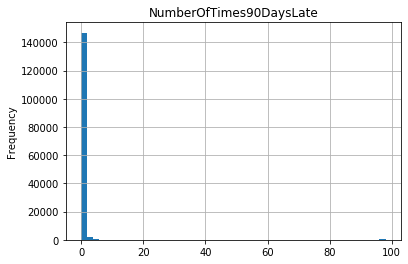

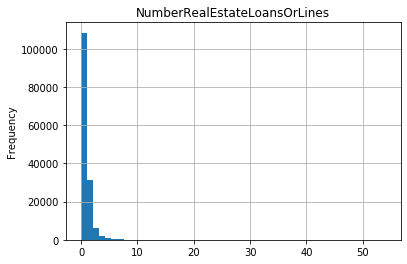

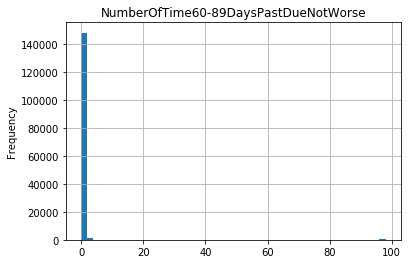

In [43]:
# Histograms are suitable for discrete data. Hence...
for Column in Types["int64"]:
  Data[Column].plot("hist", title = Column, bins = 50)
  plt.grid(True)
  plt.show()

#### Scatterplots

Text(0.5, 1.0, 'Comparison 2')

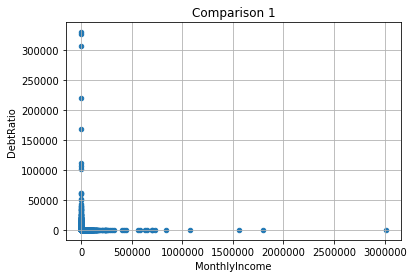

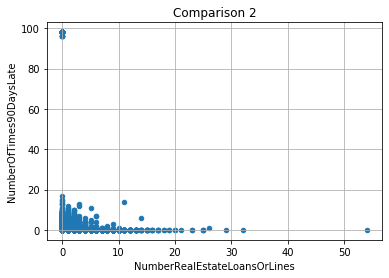

In [44]:
# 1) Monthly income and debt ratio could be correlated... let's see:
Data.plot.scatter(x = "MonthlyIncome", y = "DebtRatio")
plt.grid(True)
plt.title("Comparison 1")
# 2) We could also compare cases with more than 90 days due, with
#    general amount of real estate loans taken.
Data.plot.scatter(x = "NumberRealEstateLoansOrLines",
                  y = "NumberOfTimes90DaysLate")
plt.grid(True)
plt.title("Comparison 2")

Relationship? 

---
1) Inversely proportional. Less income implies more debt, at least in the general sense of the word (at constant "average" consumption).

2) Inversely correlated too. Seems that the bigger the loan, the more punctual is the indebted. Scary interest rates, perhaps?


#### Boxplots

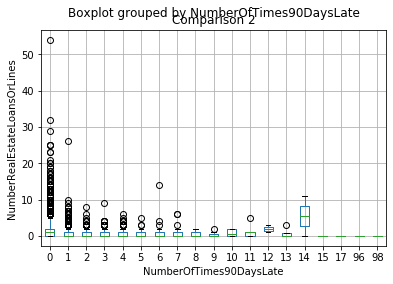

In [45]:
Data.boxplot(column = 'NumberRealEstateLoansOrLines',
             by = 'NumberOfTimes90DaysLate')
plt.grid(True)
plt.ylabel("NumberRealEstateLoansOrLines")
plt.title("Comparison 2")
plt.show() 

Any outliers?


---



Clearly there are. Plots are extremely asymmetrical and long-tailed.
As an example regarding the boxplot: There are entities that have taken longer than 90 days up to almost 380 times more than the average (0.265).

More can be seen in the command below, regarding immensely larger max values than mean and standard deviation values, except in the "age" and "number of open credit lines and loans'" cases (which hold logically, much less dispersed bar charts).

In [46]:
Data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,5.348139e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.315206e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,1.550000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,4.357500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Submit your assignment notebook! (Make sure you've changed the name to FIRSTNAME_LASTNAME_1_2): 

1.  Click the Share button in the upper-right hand corner of the notebook.
2.  Get the shareable link.
3.  Set condition to: "Anyone with the link can comment."
4.  TBD 


---
